<a href="https://colab.research.google.com/github/vaishnavishivde98/Hackathon/blob/main/Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from sklearn import linear_model #Importing linear model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


csv_data = ["502_merged_data.csv", "602_merged_data.csv","802_merged_data.csv" ]
# csv_data = ["502_merged_data.csv"]
dataset = pd.concat((pd.read_csv(file) for file in csv_data))#read the data from csv file\
dataset = dataset.drop(columns="Count")
dataset.columns = [ 'Timestamp', 'Executor', 'Available_cpu', 'Garanteed_cpu', 'Used_cpu', 'Max_cpu' ]
dataset

,Timestamp,Executor,Available_cpu,Garanteed_cpu,Used_cpu,Max_cpu
0,"April 1st 2023, 00:00:00.000",Exec502,484,320,736,"1,280"
1,"April 1st 2023, 03:00:00.000",Exec502,528,320,556,"1,280"
2,"April 1st 2023, 06:00:00.000",Exec502,772,320,292,"1,280"
3,"April 1st 2023, 09:00:00.000",Exec502,"1,116",320,148,"1,280"
4,"April 1st 2023, 12:00:00.000",Exec502,988,320,76,"1,280"
...,...,...,...,...,...,...
3614,"September 30th 2023, 09:00:00.000",Exec802,"1,474",400,126,"1,600"
3615,"September 30th 2023, 12:00:00.000",Exec802,"1,466",400,134,"1,600"
3616,"September 30th 2023, 15:00:00.000",Exec802,"1,526",400,74,"1,600"
3617,"September 30th 2023, 18:00:00.000",Exec802,"1,554",400,46,"1,600"


In [51]:
len(dataset) #Length of dataset

10624

In [52]:
dataset.shape #Shape of dataset i.e 10881 rows × 6 columns

(10624, 6)

In [102]:
dataset.Executor.value_counts()
# print(3627+3619+3378) $10624

Executor
Exec502    3627
Exec802    3619
Exec602    3378
Name: count, dtype: int64

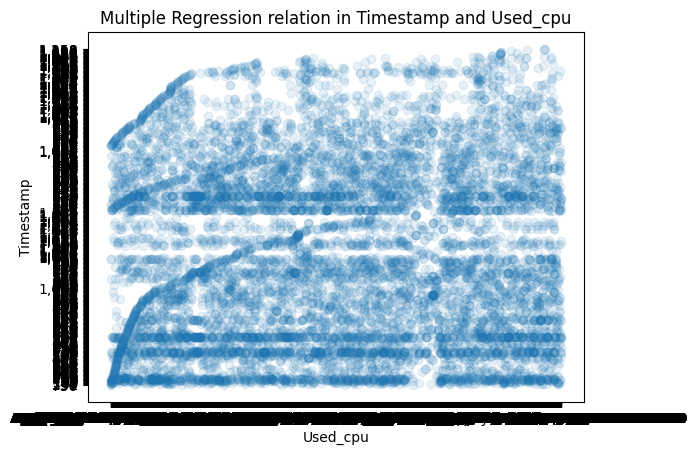

In [58]:
plt.scatter(dataset['Timestamp'] , dataset['Used_cpu'],alpha=0.1)
plt.title('Multiple Regression relation in Timestamp and Used_cpu')
plt.xlabel('Used_cpu')
plt.ylabel('Timestamp',)
plt.show()

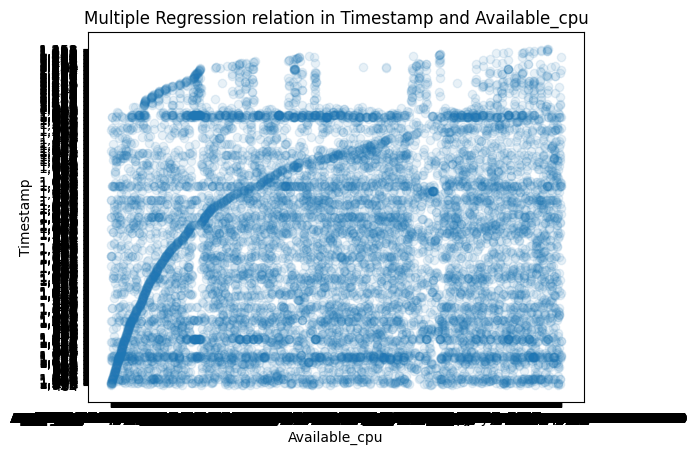

In [55]:
plt.scatter(dataset['Timestamp'] , dataset['Available_cpu'],alpha=0.1)
plt.title('Multiple Regression relation in Timestamp and Available_cpu')
plt.xlabel('Available_cpu')
plt.ylabel('Timestamp')
plt.show()

In [37]:
# plt.scatter(dataset['Timestamp'] , dataset['Garanteed_cpu'],alpha=0.5)
# plt.title('Multiple Regression relation in Timestamp and Garanteed_cpu')
# plt.xlabel('Garanteed_cpu')
# plt.ylabel('Timestamp')
# plt.show()

# plt.scatter(dataset['Timestamp'] , dataset['Max_cpu'],alpha=0.5)
# plt.title('Multiple Regression relation in Timestamp and Max_cpu')
# plt.xlabel('Max_cpu')
# plt.ylabel('Timestamp')
# plt.show()

# plt.scatter(dataset['Available_cpu'] , dataset['Max_cpu'],alpha=0.5)
# plt.title('Multiple Regression relation in Available_cpu and Max_cpu')
# plt.xlabel('Max_cpu')
# plt.ylabel('Available_cpu')
# plt.show()

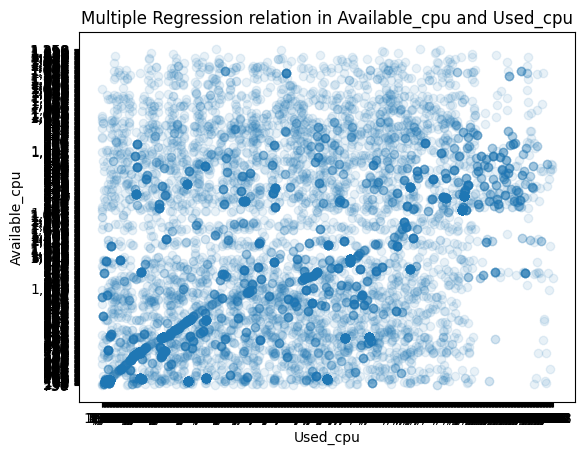

In [57]:
plt.scatter(dataset['Available_cpu'] , dataset['Used_cpu'],alpha=0.1)
plt.title('Multiple Regression relation in Available_cpu and Used_cpu')
plt.xlabel('Used_cpu')
plt.ylabel('Available_cpu')
plt.show()

In [111]:
dependent_variable = 'Used_cpu'
print(dependent_variable) # Used_cpu
print(type(dependent_variable)) #<class 'str'>

# dependent_variable = dataset['Used_cpu']
# dependent_variable
# print(type(dependent_variable))
# print(dependent_variable.shape)

Used_cpu
<class 'str'>


In [114]:
independent_variable = dataset.columns.tolist()
independent_variable.remove(dependent_variable)
# independent_variable.remove('Used_cpu')

print(independent_variable) #['Timestamp', 'Executor', 'Available_cpu', 'Garanteed_cpu', 'Max_cpu']
print(type(independent_variable)) #<class 'list'>

['Timestamp', 'Executor', 'Available_cpu', 'Garanteed_cpu', 'Max_cpu']
<class 'list'>


In [130]:
X = dataset[independent_variable].values
print(type(X)) #<class 'numpy.ndarray'>
print(X.shape) #(10624, 5)
# print(X)

Y = dataset[dependent_variable].values
print(type(Y)) #<class 'numpy.ndarray'>
print(Y.shape) #(10624,)
# print(Y)

<class 'numpy.ndarray'>
(10624, 5)
<class 'numpy.ndarray'>
(10624,)


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [135]:
print("***********X_train************")
print("Type of X_train  ===> ",type(X_train))
print("Shape of X_train ===> ",X_train.shape)
print("***********X_train************")
print("")

print("***********X_test***********")
print("Type of X_test  ===> ",type(X_test))
print("Shape of X_test ===> ",X_test.shape)
print("***********X_test************")
print("")


print("***********Y_train************")
print("Type of Y_train  ===> ",type(Y_train))
print("Shape of Y_train ===> ",Y_train.shape)
print("***********Y_train************")
print("")

print("***********Y_test***********")
print("Type of Y_test  ===> ",type(Y_test))
print("Shape of Y_test ===> ",Y_test.shape)

print("***********Y_test***********")

print("")
print(X_train[0:10])
print(Y_train[0:10])


***********X_train************
Type of X_train  ===>  <class 'numpy.ndarray'>
Shape of X_train ===>  (8499, 5)
***********X_train************

***********X_test***********
Type of X_test  ===>  <class 'numpy.ndarray'>
Shape of X_test ===>  (2125, 5)
***********X_test************

***********Y_train************
Type of Y_train  ===>  <class 'numpy.ndarray'>
Shape of Y_train ===>  (8499,)
***********Y_train************

***********Y_test***********
Type of Y_test  ===>  <class 'numpy.ndarray'>
Shape of Y_test ===>  (2125,)
***********Y_test***********

[['November 12th 2023, 03:00:00.000' 'Exec502' '1,092' 320 '1,280']
 ['September 24th 2023, 06:00:00.000' 'Exec802' '1,122' 400 '1,600']
 ['December 24th 2023, 12:00:00.000' 'Exec502' '1,268' 320 '1,280']
 ['February 25th 2023, 09:00:00.000' 'Exec802' '1,114' 320 '1,280']
 ['February 5th 2023, 03:00:00.000' 'Exec502' '1,156' 320 '1,280']
 ['June 14th 2023, 03:00:00.000' 'Exec502' '402' 320 '1,280']
 ['March 13th 2024, 03:00:00.000' 'Exec80

In [133]:
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler class
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'November 12th 2023, 03:00:00.000'